## **AI Data Analysis**

Possible Models to test:
- Moving Average Time Series Model
- Autoregressive Model

Features: Group_Name, group_id, time_sequnece

### **DataFrame**
Grabs the training and testing dataset from google drive

In [1]:
import pandas as pd
training_url = 'https://drive.google.com/file/d/1uVq3dwf4CKwLd5U0Y8uMOjxkjjXmXfvO/view?usp=sharing'
testing_url="https://drive.google.com/file/d/1X-8bWKM8-k89ORWyXcWAAuJTMuj2UDBC/view?usp=sharing"
training_file_id=training_url.split('/')[-2]
testing_file_id = testing_url.split('/')[-2]
teest_dwn_url='https://drive.google.com/uc?id=' + testing_file_id
train_dwn_url = 'https://drive.google.com/uc?id=' + training_file_id
training_dataset = pd.read_csv(train_dwn_url)
testing_dataset = pd.read_csv(teest_dwn_url)
print(training_dataset.head())
print(testing_dataset.head())

   group_id          arrive_time          depart_time  Fleet_Number   
0    2375.0  2023-05-15 07:35:09  2023-05-15 07:35:49           934  \
1    1505.0  2023-05-15 07:37:54  2023-05-15 07:39:15           934   
2    2375.0  2023-05-15 07:53:50  2023-05-15 07:55:10           934   
3    1505.0  2023-05-15 07:57:12  2023-05-15 07:58:15           934   
4    2375.0  2023-05-15 08:24:28  2023-05-15 08:24:48           934   

   Timepoint  Time Difference Type Time      Group_Name dayofweek   
0          1  0 days 00:03:26    depart  bayhi_to_oakes         M  \
1          1  0 days 00:03:26    depart  bayhi_to_oakes         M   
2          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
3          1  0 days 00:03:05    depart  bayhi_to_oakes         M   
4          1  0 days 00:02:40    depart  bayhi_to_oakes         M   

              Sequence  
0  05:00:00 - 07:45:00  
1  05:00:00 - 07:45:00  
2  07:50:00 - 07:55:00  
3  07:55:00 - 08:00:00  
4  08:05:00 - 09:00:00  
   group

### **Filter Data**
- Filter the data so data vizualization makes sense

In [2]:
#---- Filtered Training Data ----
filtered_training_data = training_dataset[training_dataset["dayofweek"].apply(lambda x: x in "MWF")]
#filtered_training_data = filtered_training_data[filtered_training_data["Sequence"] == "05:00:00 - 07:45:00"]
#filtered_training_data = filtered_training_data[filtered_training_data["Type Time"].apply(lambda x : x in "depart")]
filtered_training_data = filtered_training_data[filtered_training_data["arrive_time"].apply(lambda x: x.split("-")[1] in ["05", "04"])]
filtered_training_data = filtered_training_data[filtered_training_data["depart_time"].apply(lambda x: x.split("-")[1] in ["05", "04"])]
filtered_training_data["arrive_time"] = pd.to_datetime(filtered_training_data["arrive_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
filtered_training_data["depart_time"] = pd.to_datetime(filtered_training_data["depart_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))

#filtered_training_data["arrive_time"].apply(lambda x: x.replace(year=1990, month=1, day=1))
# arrivaldataFrame = pandas.to_datetime(timesubset["arrive_time"], format="%Y-%m-%d %H:%M:%S")
filtered_training_data = filtered_training_data.loc[filtered_training_data["group_id"] == 2375.0]

#---- Filtered Testing Data ----
filtered_testing_data = testing_dataset[testing_dataset["dayofweek"].apply(lambda x: x in "MWF")]
#filtered_testing_data = filtered_testing_data[filtered_testing_data["Sequence"] == "05:00:00 - 07:45:00"]
#filtered_testing_data = filtered_testing_data[filtered_testing_data["Type Time"].apply(lambda x : x in "depart")]
filtered_testing_data = filtered_testing_data[filtered_testing_data["arrive_time"].apply(lambda x: x.split("-")[1] in ["10", "11"])]
filtered_testing_data = filtered_testing_data[filtered_testing_data["depart_time"].apply(lambda x: x.split("-")[1] in ["10", "11"])]
filtered_testing_data["arrive_time"] = pd.to_datetime(filtered_testing_data["arrive_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
filtered_testing_data["depart_time"] = pd.to_datetime(filtered_testing_data["depart_time"]).apply(lambda x: x.replace(year=1990, month=1, day=1))
filtered_testing_data["Time Difference"] = filtered_testing_data[filtered_training_data["Time Difference"]
filtered_testing_data = filtered_testing_data.loc[filtered_testing_data["group_id"] == 2375.0]
#filtered_training_data.to_csv("G:\\My Drive\\Fall 2023\\TIM 147\\Bus-Data-Project\\output_train.csv", index=False, header=True)
columns_to_drop = ["group_id", "Type Time", "Group_Name", "dayofweek", "Timepoint", "Fleet_Number", "Sequence", "arrive_time"]
filtered_training_data.drop(columns=columns_to_drop, inplace=True)
filtered_testing_data.drop(columns=columns_to_drop, inplace=True)
filtered_testing_data.to_csv("./output.csv", index=False, header=True)

print("Filter train", filtered_training_data)
print("Filter Test", filtered_testing_data)

<class 'pandas.core.frame.DataFrame'>
Filter train              depart_time  Time Difference
0    1990-01-01 07:35:49  0 days 00:03:26
2    1990-01-01 07:55:10  0 days 00:03:05
4    1990-01-01 08:24:48  0 days 00:02:40
6    1990-01-01 08:38:22  0 days 00:03:53
8    1990-01-01 09:04:00  0 days 00:03:57
...                  ...              ...
2928 1990-01-01 17:10:23  0 days 00:02:31
2930 1990-01-01 17:30:36  0 days 00:03:03
2934 1990-01-01 09:19:54  0 days 00:03:29
2948 1990-01-01 08:29:57  0 days 00:03:05
2964 1990-01-01 08:09:46  0 days 00:02:52

[409 rows x 2 columns]
Filter Test              depart_time  Time Difference
88   1990-01-01 11:35:54  0 days 00:03:58
90   1990-01-01 12:41:13  0 days 00:03:27
92   1990-01-01 13:11:39  0 days 00:03:52
94   1990-01-01 13:35:18  0 days 00:03:05
110  1990-01-01 11:33:59  0 days 00:03:52
...                  ...              ...
2482 1990-01-01 13:21:28  0 days 00:03:07
2490 1990-01-01 13:55:14  0 days 00:03:39
2492 1990-01-01 08:30:03  0 day

### **Data Visualization**
- Vizusalize the data with group name and time

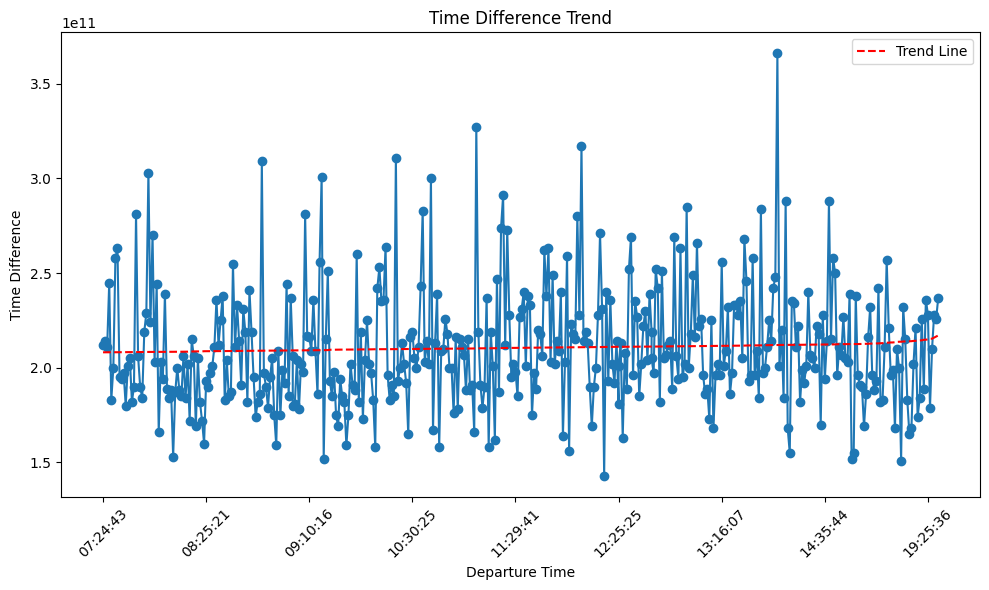

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import matplotlib.dates as mdates
import numpy as np

filtered_training_data['depart_time'] = pd.to_datetime(filtered_training_data['depart_time'])
filtered_training_data['Time Difference'] = pd.to_timedelta(filtered_training_data['Time Difference'])

# Sort the data by depart_time
filtered_training_data.sort_values('depart_time', inplace=True)
time_only = filtered_training_data['depart_time'].dt.strftime('%H:%M:%S')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(time_only, filtered_training_data['Time Difference'], marker='o', linestyle='-')

# Adding a trend line (linear regression)
x = mdates.date2num(filtered_training_data['depart_time'])  # Convert to floating-point representation of dates
y = filtered_training_data['Time Difference'].dt.total_seconds()

coefficients = np.polyfit(x, y, 1)
trend = np.poly1d(coefficients)
plt.plot(time_only, pd.to_timedelta(trend(x), unit='s'), linestyle='--', color='red', label='Trend Line')

plt.xlabel('Departure Time')
plt.ylabel('Time Difference')
plt.title('Time Difference Trend')
plt.legend()
# Setting up major ticks for every 5th data point (adjust as needed)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))  # Adjust '6' to set the number of major ticks

# Formatting x-axis ticks as HH:MM:SS
plt.xticks(rotation=45)

plt.tight_layout()

# Show plot
plt.show()

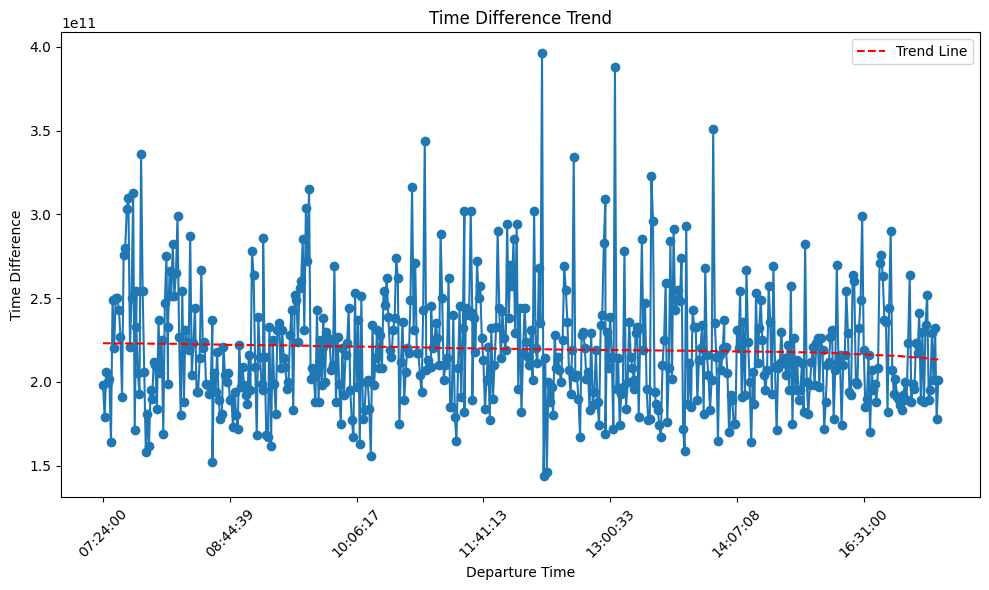

In [21]:

#filtered_testing_data.drop([466, 2456,2458], inplace=True)
filtered_testing_data['depart_time'] = pd.to_datetime(filtered_testing_data['depart_time'])
filtered_testing_data['Time Difference'] = pd.to_timedelta(filtered_testing_data['Time Difference'])

# Sort the data by depart_time
filtered_testing_data.sort_values('depart_time', inplace=True)
time_only = filtered_testing_data['depart_time'].dt.strftime('%H:%M:%S')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(time_only, filtered_testing_data['Time Difference'], marker='o', linestyle='-')

# Adding a trend line (linear regression)
x = mdates.date2num(filtered_testing_data['depart_time'])  # Convert to floating-point representation of dates
y = filtered_testing_data['Time Difference'].dt.total_seconds()
#y.drop([466, 2456,2458], inplace=True)
#print("y", y)
coefficients = np.polyfit(x, y, 1)
trend = np.poly1d(coefficients)
plt.plot(time_only, pd.to_timedelta(trend(x), unit='s'), linestyle='--', color='red', label='Trend Line')

plt.xlabel('Departure Time')
plt.ylabel('Time Difference')
plt.title('Time Difference Trend')
plt.legend()
# Setting up major ticks for every 5th data point (adjust as needed)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))  # Adjust '6' to set the number of major ticks

# Formatting x-axis ticks as HH:MM:SS
plt.xticks(rotation=45)

plt.tight_layout()

# Show plot
plt.show()

### **Auto Regressive Integrated Moving Average Model**

In [22]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt
from matplotlib import pyplot

ARIMA_training_data = filtered_training_data.copy()
ARIMA_training_data.set_index(ARIMA_training_data["depart_time"], inplace=True)
ARIMA_training_data["Time Difference"] = ARIMA_training_data["Time Difference"].dt.total_seconds()
ARIMA_training_data.drop(columns=["depart_time"], inplace=True)
print(ARIMA_training_data)
# Fit ARIMA model (p, d, q) = (2, 1, 2) - Example values, adjust as needed
p, d, q = 2, 1, 2
model = ARIMA(ARIMA_training_data, order=(p, d, q))
arima_results = model.fit()

# Summary of the ARIMA model
print(arima_results.summary())

# Predictions using ARIMA model
# Example: Forecasting the next 10 time steps
forecast_steps = len(filtered_testing_data)
forecast = arima_results.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted Values:")
print(forecast)

                     Time Difference
depart_time                         
1990-01-01 07:24:43            212.0
1990-01-01 07:25:01            214.0
1990-01-01 07:25:08            211.0
1990-01-01 07:25:14            245.0
1990-01-01 07:25:15            183.0
...                              ...
1990-01-01 19:50:41            179.0
1990-01-01 19:58:02            210.0
1990-01-01 20:55:16            228.0
1990-01-01 21:58:20            226.0
1990-01-01 22:57:22            237.0

[409 rows x 1 columns]


C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

                               SARIMAX Results                                
Dep. Variable:        Time Difference   No. Observations:                  409
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1992.305
Date:                Sat, 02 Dec 2023   AIC                           3994.609
Time:                        13:13:08   BIC                           4014.665
Sample:                             0   HQIC                          4002.545
                                - 409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9071      0.147     -6.150      0.000      -1.196      -0.618
ar.L2          0.0391      0.056      0.697      0.486      -0.071       0.149
ma.L1         -0.0517      0.140     -0.370      0.7

C:\Users\garfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Evalualte Model

[198.0, 179.0, 206.0, 200.0, 202.0, 164.0, 249.0, 220.0, 250.0, 250.0, 243.0, 227.0, 191.0, 276.0, 280.0, 303.0, 310.0, 221.0, 250.0, 313.0, 171.0, 254.0, 233.0, 205.0, 193.0, 336.0, 254.0, 206.0, 158.0, 181.0, 162.0, 195.0, 190.0, 212.0, 210.0, 184.0, 237.0, 205.0, 225.0, 169.0, 247.0, 275.0, 199.0, 233.0, 266.0, 251.0, 282.0, 251.0, 265.0, 299.0, 227.0, 180.0, 254.0, 188.0, 231.0, 224.0, 219.0, 287.0, 204.0, 223.0, 244.0, 194.0, 194.0, 214.0, 267.0, 220.0, 224.0, 199.0, 198.0, 193.0, 198.0, 237.0, 152.0, 205.0, 194.0, 218.0, 189.0, 178.0, 181.0, 221.0, 204.0, 200.0, 205.0, 189.0, 190.0, 173.0, 194.0, 180.0, 172.0, 222.0, 197.0, 209.0, 198.0, 192.0, 187.0, 216.0, 195.0, 278.0, 264.0, 209.0, 168.0, 239.0, 215.0, 199.0, 195.0, 286.0, 215.0, 168.0, 167.0, 233.0, 162.0, 225.0, 199.0, 181.0, 231.0, 235.0, 208.0, 231.0, 214.0, 209.0, 196.0, 200.0, 228.0, 243.0, 183.0, 252.0, 249.0, 224.0, 256.0, 260.0, 285.0, 231.0, 304.0, 272.0, 315.0, 202.0, 208.0, 203.0, 188.0, 243.0, 188.0, 225.0, 198.0

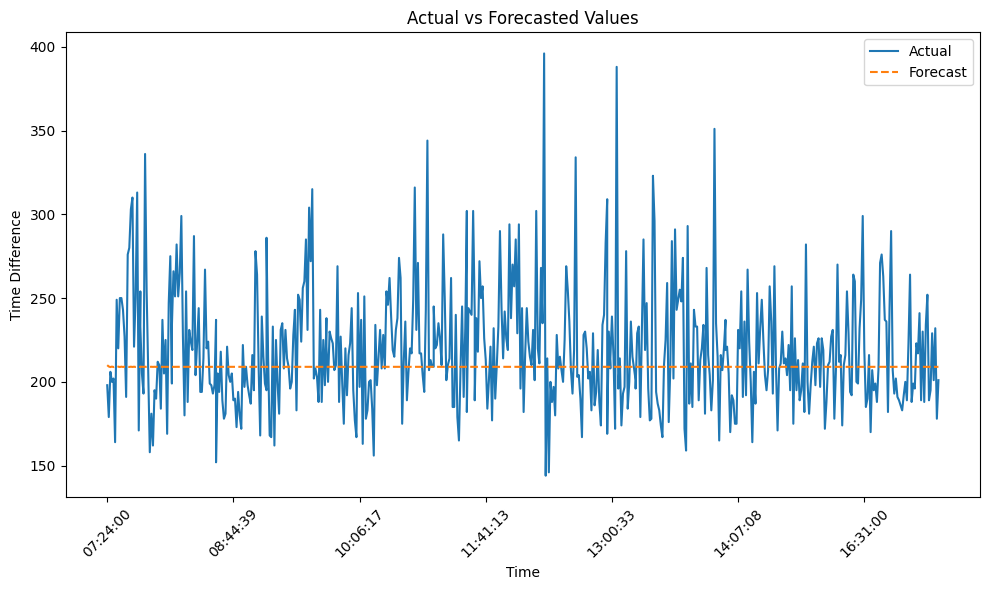

In [23]:
# Create a DataFrame for the actual values corresponding to the forecast period

Actual = [x for x in filtered_testing_data['Time Difference'].dt.total_seconds()]
forecast = [x for x in forecast]
print(Actual)
print(forecast)
# Make forecasts using the ARIMA model (assuming 'forecast' is the predicted values)


# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error, etc.)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Actual, forecast)
mae = mean_absolute_error(Actual, forecast)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Visualize the actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(filtered_testing_data['depart_time'].dt.strftime('%H:%M:%S'), Actual, label='Actual')
plt.plot(filtered_testing_data['depart_time'].dt.strftime('%H:%M:%S'), forecast, label='Forecast', linestyle='dashed')
plt.title('Actual vs Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Time Difference')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(9))  # Adjust '6' to set the number of major ticks

# Formatting x-axis ticks as HH:MM:SS
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()